# Outliers and Anomalies

In this notebook, we will analyze the dataset for outliers and anomalies, as addressing them is a crucial step in **standardizing** numerical values during the implementation of a machine learning project.

Given that the explanatory variables represent time series, we will treat the group of column series (e.g., col-*) as a single variable type and inspect them in detail.

In [1]:
import pandas as pd
import os

base_dir = os.path.abspath(os.path.join('..', '..', '..', 'data', 'raw'))
file_path = os.path.join(base_dir, 'train.csv') 

patients = pd.read_csv(file_path, low_memory=False)

In [2]:
bg_cols = [col for col in patients.columns if col.startswith('bg-')]
insulin_cols = [col for col in patients.columns if col.startswith('insulin-')]
carbs_cols = [col for col in patients.columns if col.startswith('carbs-')]
hr_cols = [col for col in patients.columns if col.startswith('hr-')]
steps_cols = [col for col in patients.columns if col.startswith('steps-')]
cals_cols = [col for col in patients.columns if col.startswith('cals-')]
activity_cols = [col for col in patients.columns if col.startswith('activity-')]

> *Note:*  The commonly used IQR method for outlier detection is not applicable to our dataset due to its skewed distribution. This issue will be addressed in the next phase of the project - "Data Preprocessing".

## Outliers for bg-* columns

In [3]:
patients[bg_cols].describe()

,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,bg-5:15,bg-5:10,...,bg-0:45,bg-0:40,bg-0:35,bg-0:30,bg-0:25,bg-0:20,bg-0:15,bg-0:10,bg-0:05,bg-0:00
count,149770.000000,158533.000000,163364.000000,149766.000000,158254.000000,163770.000000,149763.000000,157973.000000,164174.000000,149771.000000,...,172565.000000,150859.000000,152906.000000,173160.000000,151028.000000,152743.000000,173752.000000,151202.000000,152586.000000,174328.000000
mean,8.211018,8.230449,8.253291,8.210988,8.229649,8.254083,8.211049,8.228888,8.254602,8.211000,...,8.276668,8.217483,8.220633,8.277074,8.217376,8.219903,8.277226,8.217047,8.218819,8.277378
std,2.852188,2.913438,2.945594,2.852090,2.911313,2.947651,2.852212,2.909304,2.949689,2.852315,...,2.985219,2.853859,2.866984,2.986846,2.854054,2.864910,2.988465,2.854402,2.863166,2.990266
min,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,...,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000
25%,6.100000,6.100000,6.100000,6.100000,6.100000,6.100000,6.100000,6.100000,6.100000,6.100000,...,6.100000,6.200000,6.100000,6.100000,6.200000,6.100000,6.100000,6.200000,6.100000,6.100000
50%,7.600000,7.600000,7.700000,7.600000,7.600000,7.700000,7.600000,7.600000,7.700000,7.600000,...,7.700000,7.600000,7.600000,7.700000,7.600000,7.600000,7.700000,7.600000,7.600000,7.700000
75%,9.800000,9.800000,9.800000,9.800000,9.800000,9.800000,9.800000,9.800000,9.800000,9.800000,...,9.900000,9.800000,9.800000,9.900000,9.800000,9.800000,9.900000,9.800000,9.800000,9.900000
max,22.200000,25.100000,27.800000,22.200000,25.100000,27.800000,22.200000,25.100000,27.800000,22.200000,...,27.800000,22.200000,22.700000,27.800000,22.200000,22.700000,27.800000,22.200000,22.700000,27.800000


In [4]:
# Get the describe() result for all 'bg-*' columns
df_bg = patients[bg_cols].describe()

# Extract the minimum and maximum values across all bg-* columns
overall_min = df_bg.loc['min'].min()  # Get the smallest 'min' value across all bg-* columns
overall_max = df_bg.loc['max'].max()  # Get the largest 'max' value across all bg-* columns

# Display the results
print(f"Overall minimum value across all bg-* columns: {overall_min}")
print(f"Overall maximum value across all bg-* columns: {overall_max}")

Overall minimum value across all bg-* columns: 2.2
Overall maximum value across all bg-* columns: 27.8


In [5]:
patients.groupby('p_num')['bg-5:45'].agg(['min', 'max'])

,min,max
p_num,,
p01,2.3,27.8
p02,2.2,22.2
p03,2.2,22.2
p04,2.2,18.4
p05,2.9,20.6
p06,2.9,27.8
p10,2.2,15.9
p11,2.2,20.8
p12,2.8,22.2


> <b>Summary</b>: There are some extreme values for blood glucose present but still realistic for some patients.

## Outliers for insulin-* columns

In [6]:
# Get the describe() result for all 'insulin-*' columns
df_insulin = patients[insulin_cols].describe()

# Extract the minimum and maximum values across all insulin-* columns
overall_min = df_insulin.loc['min'].min() 
overall_max = df_insulin.loc['max'].max()  

# Display the results
print(f"Overall minimum value across all insulin-* columns: {overall_min}")
print(f"Overall maximum value across all insulin-* columns: {overall_max}")

Overall minimum value across all insulin-* columns: -0.3078
Overall maximum value across all insulin-* columns: 46.311


<b>a) Investigating negative insulin</b>

In [7]:
# (patients[insulin_cols] < 0).groupby(patients['p_num']).sum()  # result: only p12 has some negativ values

# Create an empty list to store unique negative values
unique_negative_values = set()

# Iterate through each insulin column and patient 'p12'
for col in insulin_cols:
    negative_values = patients[(patients['p_num'] == 'p12') & (patients[col] < 0)][col]
    
    # Add the negative values to the set (automatically handles uniqueness)
    unique_negative_values.update(negative_values.dropna())

# Convert the set to a sorted list and display
unique_negative_values = sorted(unique_negative_values)
print(unique_negative_values)


[-0.3078, -0.059]


<b>a) Investigating positiv extremes</b>

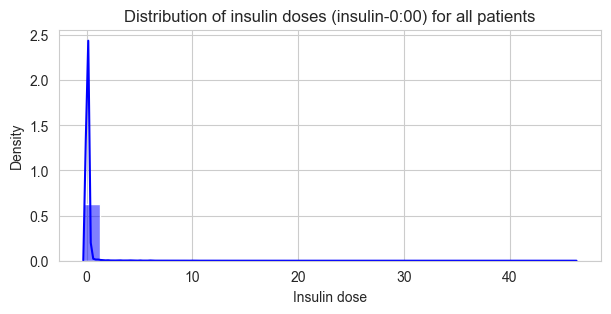

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

insulin_values = patients["insulin-0:00"].dropna()

# Create a figure for the histogram and KDE plot
plt.figure(figsize=(7, 3))

sns.histplot(insulin_values, bins=30, kde=True, color='blue', stat='density')

# Add labels and title
plt.xlabel('Insulin dose')
plt.ylabel('Density')
plt.title('Distribution of insulin doses (insulin-0:00) for all patients')

plt.show()

In [9]:
patients.groupby('p_num')['insulin-0:00'].agg(['min', 'max'])

,min,max
p_num,,
p01,0.0000,11.7417
p02,0.0000,18.0833
p03,0.0000,46.3110
p04,0.0000,42.7800
p05,0.0000,8.1542
p06,0.0000,14.1833
p10,0.0000,9.0833
p11,0.0000,12.4167
p12,-0.3078,25.3500


> <b>Summary:</b> For patient ``p12``, we detected some negative values. Negative insulin values are often the result of data entry errors, sensor malfunctions, or recording issues in the dataset.
> Since there are only two different negative values and they fall outside the usual value ranges, we will replace them with either their corresponding positive values or zeros. This step will be carried out during the data preprocessing phase.
>
> Additionally, for two other patients, we observe extremely high insulin doses. While these values do not appear to be errors, the data is still right-skewed and will need to be addressed.

## Outliers for carbs-* columns

In [10]:
# Get the describe() result for all 'carbs-*' columns
df_carbs = patients[carbs_cols].describe()

# Extract the minimum and maximum values across all hr-* columns
overall_min = df_carbs.loc['min'].min() 
overall_max = df_carbs.loc['max'].max() 

# Display the results
print(f"Overall minimum value across all carbs-* columns: {overall_min}")
print(f"Overall maximum value across all carbs-* columns: {overall_max}")

Overall minimum value across all carbs-* columns: 1.0
Overall maximum value across all carbs-* columns: 852.0


> <b>Summary:</b> The values for carbohydrate consumption, ranging from 1.0 to 852.0 grams, raise concerns about their realism and appropriateness for our use case. Given that these data are self-reported by patients and 98% of the values are missing, we may consider excluding these columns from the model.

## Outliers for hr-* columns

In [11]:
# Get the describe() result for all 'hr-*' columns
df_hr = patients[hr_cols].describe()

# Extract the minimum and maximum values across all hr-* columns
overall_min = df_hr.loc['min'].min()  
overall_max = df_hr.loc['max'].max()  # Group by 'p_num' and calculate the min and max of 'hr-5:55' for each patient
patients.groupby('p_num')['hr-5:55'].agg(['min', 'max'])

# Display the results
print(f"Overall minimum value across all hr-* columns: {overall_min}")
print(f"Overall maximum value across all hr-* columns: {overall_max}")

Overall minimum value across all hr-* columns: 37.6
Overall maximum value across all hr-* columns: 185.3


In [12]:
# Group by 'p_num' and calculate the min and max of 'hr-5:55' for each patient
patients.groupby('p_num')['hr-5:55'].agg(['min', 'max'])

,min,max
p_num,,
p01,47.3,163.8
p02,40.0,185.3
p03,47.2,156.8
p04,50.7,164.4
p05,43.9,158.2
p06,37.6,155.1
p10,47.4,184.2
p11,49.7,164.8
p12,49.7,136.6


> <b>Summary:</b>
> For one patient (``p06``), we observed an unusually low heart rate of 37.6 bpm. While this value could be realistic for elite athletes or during deep sleep, it is generally considered abnormally low for most people. For now, we will leave this value as is, as it might indicate an important clinical signal (e.g., severe bradycardia). However, we should keep in mind that in a small dataset of only nine patients, even a single outlier can have a larger impact compared to larger datasets. If we apply models like random forests, gradient boosting or SVM - which are more robust to outliers - this outlier might have minimal impact.
> 
>A similar consideration applies to the extreme value of 185.3 bpm for patient ``p02``.

## Outliers for steps-* columns

In [13]:
# Get the describe() result for all 'steps-*' columns
df_steps = patients[steps_cols].describe()

# Extract the minimum and maximum values across all steps-* columns
overall_min = df_steps.loc['min'].min()  
overall_max = df_steps.loc['max'].max() 

# Display the results
print(f"Overall minimum value across all steps-* columns: {overall_min}")
print(f"Overall maximum value across all steps-* columns: {overall_max}")

Overall minimum value across all steps-* columns: 0.0
Overall maximum value across all steps-* columns: 1359.0


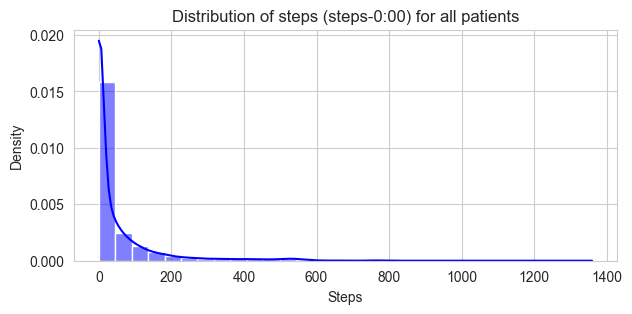

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

steps_values = patients["steps-0:00"].dropna()

# Create a figure for the histogram and KDE plot
plt.figure(figsize=(7, 3))

sns.histplot(steps_values, bins=30, kde=True, color='blue', stat='density')

# Add labels and title
plt.xlabel('Steps')
plt.ylabel('Density')
plt.title('Distribution of steps (steps-0:00) for all patients')

plt.show()

In [15]:
# Group by 'p_num' and calculate the min and max of 'steps-0:00' for each patient
patients.groupby('p_num')['steps-0:00'].agg(['min', 'max'])

,min,max
p_num,,
p01,0.0,741.0
p02,1.0,1359.0
p03,0.0,582.0
p04,0.0,673.0
p05,0.0,660.0
p06,0.0,627.0
p10,0.0,783.0
p11,0.0,660.0
p12,0.0,567.0


In [16]:
# Filter the dataset for patient 'p02' where 'steps-0:00' equals 1359
activity_steps_1359_p02 = patients[(patients['p_num'] == 'p02') & (patients['steps-0:00'] == 1359)][['activity-0:00', 'steps-0:00']]

# Display the result
print(activity_steps_1359_p02)

      activity-0:00  steps-0:00
19127       Walking      1359.0


In [17]:
patients[(patients['p_num'] == 'p02') & (patients['steps-0:00'] == 1359)][steps_cols + activity_cols]

,steps-5:55,steps-5:50,steps-5:45,steps-5:40,steps-5:35,steps-5:30,steps-5:25,steps-5:20,steps-5:15,steps-5:10,...,activity-0:45,activity-0:40,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00
19127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Walking,Walking,Walking,Walking,Walking,Walking,Walking,Walking,Walking,Walking


><b>Summary:</b> The average walking speed for a healthy adult is around 100 to 120 steps per minute. Over a 5-minute period, a typical person would walk approximately 500 to 600 steps at a moderate pace. Therefore, a value of 1359 steps appears to be an outlier or extreme value. However, after considering the frequency and trends in neighboring records, along with the fact that the activity was reported as "Walking," we can conclude that this value is likely valid in the context of possible intense physical activity.

## Outliers for cals-* columns

In [18]:
# Get the describe() result for all 'cals-*' columns
df_cals = patients[cals_cols].describe()

# Extract the minimum and maximum values across all steps-* columns
overall_min = df_cals.loc['min'].min()  
overall_max = df_cals.loc['max'].max() 

# Display the results
print(f"Overall minimum value across all cals-* columns: {overall_min}")
print(f"Overall maximum value across all cals-* columns: {overall_max}")

Overall minimum value across all cals-* columns: 0.03
Overall maximum value across all cals-* columns: 116.1


><b>Summary:</b> The values observed here appear realistic, considering potential physical activities.